# Analyzing MTA Turnstile Data

## Introduction

In this Jupyter notebook, we will explore the MTA Turnstile Data obtained from the NYC Open Data platform. The MTA Turnstile Data provides information about entries and exits at subway turnstiles across different stations and dates. We will analyze this dataset to gain insights into subway ridership patterns, trends over time, and any other interesting observations.

## Dataset Description

The MTA Turnstile Data is structured in a tabular format and includes the following columns:

- `transit_timestamp`: Timestamp of the data record
- `transit_mode`: Mode of transit (e.g., subway)
- `station_complex_id`: ID of the station complex
- `station_complex`: Name of the station complex where the turnstile is located
- `borough`: Borough where the station is located
- `payment_method`: Payment method used (e.g., metrocard, omny)
- `fare_class_category`: Fare class category (e.g., Metrocard - Full Fare, Metrocard - Unlimited 7-Day)
- `ridership`: Number of riders
- `transfers`: Number of transfers associated with the transaction
- `latitude`: Latitude coordinate of the station
- `longitude`: Longitude coordinate of the station

## Analysis Goals

Our analysis will include the following tasks:
1. Data cleaning and preprocessing.
2. Data analysis to understand the distribution of entries
3. Time series analysis to examine daily, weekly, and seasonal variations in subway ridership.
4. Visualizations using histograms, line plots, and other relevant charts to present our findings.



# Loading the Dataset:
Use Python's Pandas library to load the MTA Turnstile Data into your notebook as a DataFrame. You can use the read_json() function to directly read the JSON data from the API endpoint into a DataFrame.

# Data Cleaning and Preprocessing
Before conducting exploratory data analysis, it's essential to clean and preprocess the data. We will check for missing values, duplicates, and inconsistencies in the dataset and clean the data as needed.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Define the base URL of the API endpoint
url = "https://data.ny.gov/resource/wujg-7c2s.json"
df = pd.read_json(url)

def fetch_data_from_api(base_url, limit=1000, total_rows=200000):
    offset = 0  # Initial offset
    all_rows = []  # Initialize an empty list to store all the rows

    # Loop until all rows are fetched or until we reach the desired number of rows
    while offset < total_rows:
        # Construct the API URL with the limit and offset parameters
        url = f"{base_url}?$limit={limit}&$offset={offset}"

        #Make the GET request to fetch data
        response = requests.get(url)

        #Check if the request was successful
        if response.status_code == 200:
            #Extract the JSON data from the response
            data = response.json()

            # Check if there are no more rows returned
            if len(data) == 0:
                break  #Exit the loop if no more data is returned

            #Append the fetched rows to the list
            all_rows.extend(data)

            # Increment the offset for the next iteration
            offset += limit
        else:
            print("Error:", response.status_code)
            break  # Exit the loop in case of an error


# Print the first 100 rows
print("First 100 rows:")
for row in all_rows[:100]:
    print(row)


First 100 rows:
{'transit_timestamp': '2024-03-07T00:00:00.000', 'transit_mode': 'subway', 'station_complex_id': '39', 'station_complex': 'Bay Ridge-95 St (R)', 'borough': 'Brooklyn', 'payment_method': 'omny', 'fare_class_category': 'OMNY - Full Fare', 'ridership': '1.0', 'transfers': '0.0', 'latitude': '40.616623', 'longitude': '-74.030876', 'georeference': {'type': 'Point', 'coordinates': [-74.030876, 40.616623]}, ':@computed_region_kjdx_g34t': '2090', ':@computed_region_yamh_8v7k': '894', ':@computed_region_wbg7_3whc': '887'}
{'transit_timestamp': '2024-03-07T01:00:00.000', 'transit_mode': 'subway', 'station_complex_id': '618', 'station_complex': '14 St (A,C,E)/8 Av (L)', 'borough': 'Manhattan', 'payment_method': 'metrocard', 'fare_class_category': 'Metrocard - Seniors & Disability', 'ridership': '1.0', 'transfers': '0.0', 'latitude': '40.740894', 'longitude': '-74.00169', 'georeference': {'type': 'Point', 'coordinates': [-74.00169, 40.740894]}, ':@computed_region_kjdx_g34t': '2095'

In [107]:
# Print column names to identify the correct one
print(df.columns)

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'georeference',
       ':@computed_region_kjdx_g34t', ':@computed_region_yamh_8v7k',
       ':@computed_region_wbg7_3whc'],
      dtype='object')


## Data Analysis

### Ridership by Borough
- **Analysis Approach**: Ridership by borough involves grouping the data by borough and calculating the total ridership for each borough.
- **Visualization**: A pie chart can be created to visualize the distribution of ridership across different boroughs, providing insights into the relative contribution of each borough to the total ridership in the city.

### Entries in Each Borough
- **Analysis Approach**: Entries in each borough involve grouping the data by borough and date, then calculating the total entries for each borough on each date.
- **Visualization**: A bar graph can be created to visualize the trend of entries over time for each borough, providing insights into differences in transit usage patterns between different areas of the city.

### Entries by Fare Class
- **Analysis Approach**: Entries by fare class involve grouping the data by fare class category and date, then calculating the total entries for each fare class category on each date.
- **Visualization**: Visualization techniques such as bar plots or line plots can be used to show the trend of entries over time for each fare class category, allowing for comparisons between different fare types.

### Entries by Payment Methods
- **Analysis Approach**: Entries by payment methods involve grouping the data by payment method and date, then calculating the total entries for each payment method on each date.
- **Visualization**: Bar plots or line plots can illustrate the trend of entries over time for each payment method, allowing for comparisons and identifying any shifts in payment preferences over time.


These analyses provide valuable insights into transit usage patterns in New York City, considering various factors such as fare class categories, payment methods, and boroughs.





# Ridership by Borough

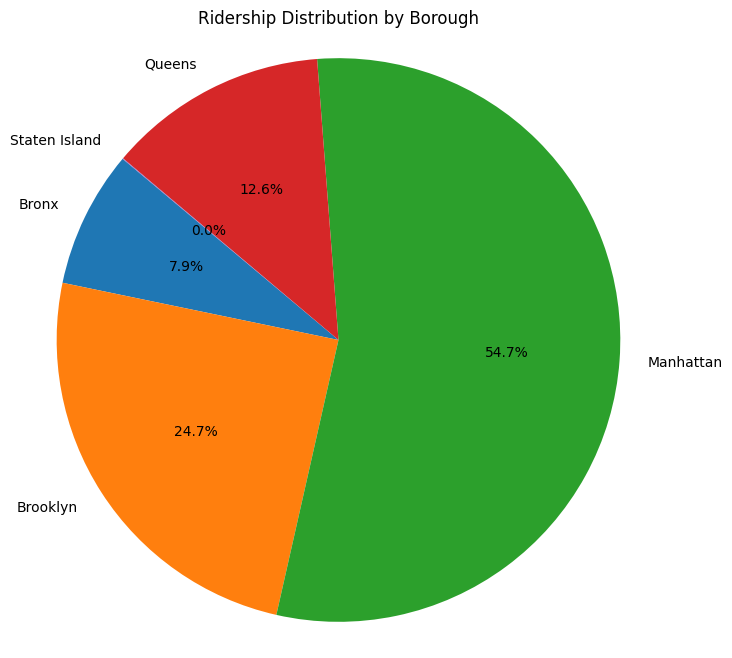

In [105]:
# Read the data directly from the URL using pandas
try:
    df = pd.read_json(url)
except Exception as e:
    print("Error:", e)
    df = None

# Check if data was loaded successfully
if df is not None:
    # Group by borough and calculate total ridership for each borough
    ridership_by_borough = df.groupby('borough')['ridership'].sum()

    # Plot the ridership by borough using a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(ridership_by_borough, labels=ridership_by_borough.index, autopct='%1.1f%%', startangle=140)
    plt.title('Ridership Distribution by Borough')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Failed to load data from the API.")


# Entries in Each Borough

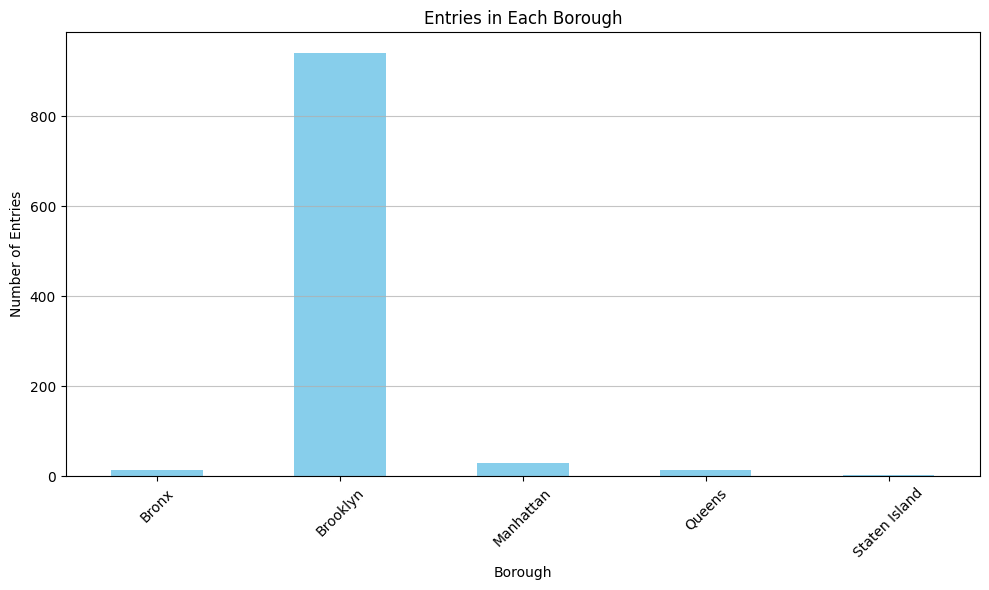

In [27]:
try:
    df = pd.read_json(url)
except Exception as e:
    print("Error:", e)
    df = None
if df is not None:
    # Group by borough and count the number of entries for each borough
    entries_by_borough = df['borough'].value_counts()

    # Reindex to include all 5 boroughs
    entries_by_borough = entries_by_borough.reindex(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], fill_value=0)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    entries_by_borough.plot(kind='bar', color='skyblue')
    plt.xlabel('Borough')
    plt.ylabel('Number of Entries')
    plt.title('Entries in Each Borough')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()
else:
    print("Failed to load data from the API.")

# Entires by Payment Method





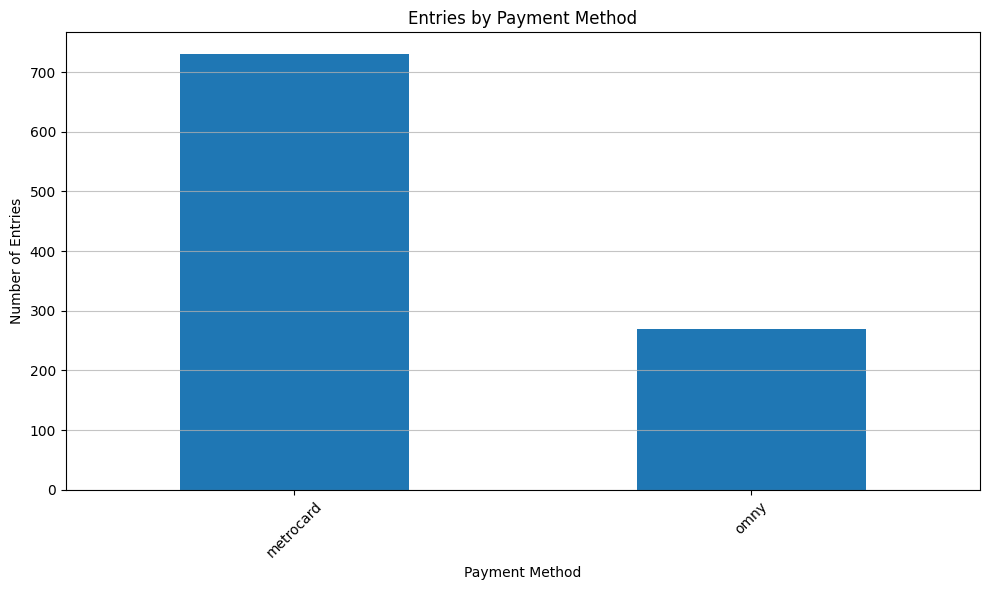

In [29]:
try:
    df = pd.read_json(url)
except Exception as e:
    print("Error:", e)
    df = None

if df is not None:
    # Group by payment method and count the number of entries for each method
    entries_by_payment_method = df['payment_method'].value_counts()

    # Create a histogram
    plt.figure(figsize=(10, 6))
    entries_by_payment_method.plot(kind='bar')
    plt.xlabel('Payment Method')
    plt.ylabel('Number of Entries')
    plt.title('Entries by Payment Method')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()
else:
    print("Failed to load data from the API.")

# Entires by Fair Class


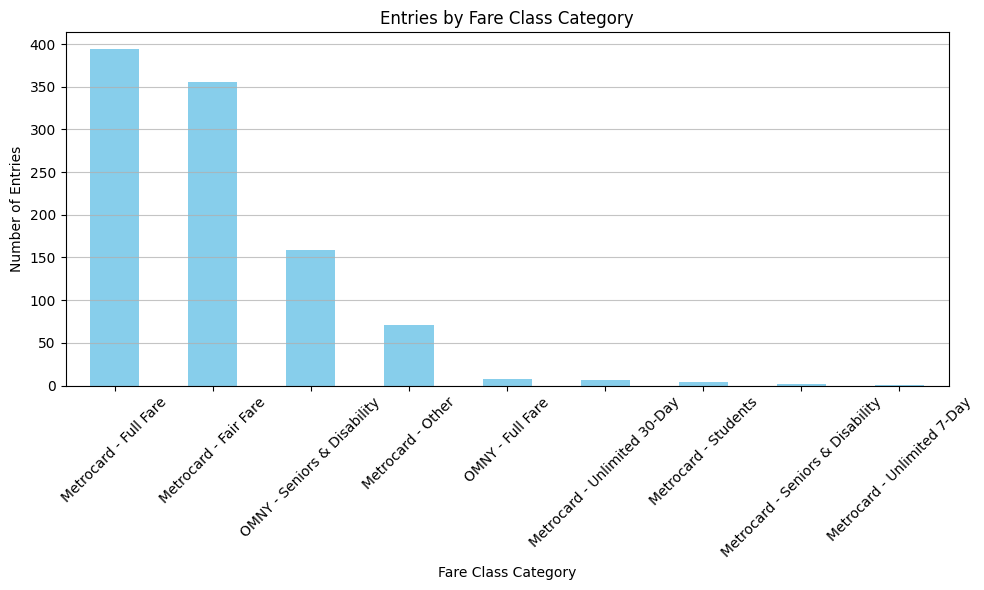

In [ ]:
try:
    df = pd.read_json(url)
except Exception as e:
    print("Error:", e)
    df = None

if df is not None:
    # Group by fare class category and count the number of entries for each category
    entries_by_fare_class = df['fare_class_category'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    entries_by_fare_class.plot(kind='bar', color='skyblue')
    plt.xlabel('Fare Class Category')
    plt.ylabel('Number of Entries')
    plt.title('Entries by Fare Class Category')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()
else:
    print("Failed to load data from the API.")

## Time Series Analysis

The dataset contains transit data from New York City, including information such as transit timestamps. Using this data and the frequency of entires, I was able to graph the total entries over a specific timeframe.

### Data Preprocessing
The data is loaded directly from the API endpoint and processed to convert timestamps to datetime format. Entries are grouped by both date and borough, fare class category, and payment method. Total entries for each combination are calculated, and missing values are filled with zeros. The DataFrame is then sorted by date.


**Entries Over Time by Borough**:
     A line plot is created to visualize the trend of entries over time for each borough. This analysis helps identify any overall trends or patterns in transit usage across different areas of the city.

### Insights
- The time series analysis provides insights into fluctuations in transit usage over time
- Further analysis could explore correlations between transit usage and external factors such as weather conditions, economic indicators, or major events.

This comprehensive analysis facilitates better understanding and informed decision-making in urban transportation planning and management.


## Total Entries Over Time


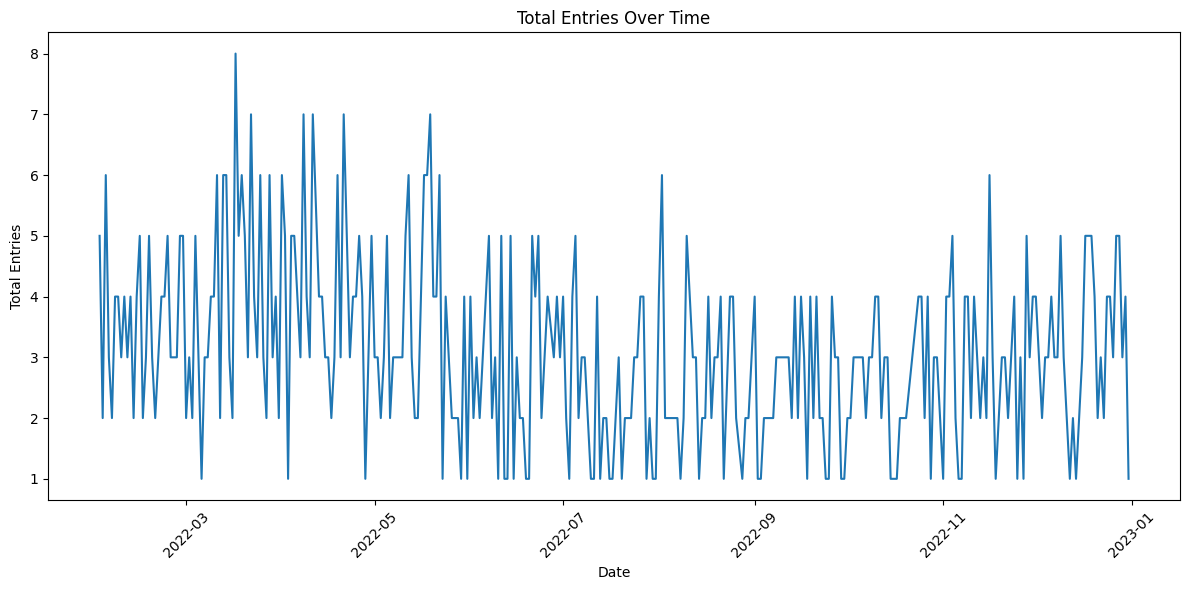

In [86]:
try:
    df = pd.read_json(url)
except Exception as e:
    print("Error:", e)
    df = None

if df is not None:
    #Convert 'transit_timestamp' to datetime
    df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

    #Group by date and calculate total entries for each date
    entries_by_date = df.groupby(df['transit_timestamp'].dt.date).size()

    #Create a line plot
    plt.figure(figsize=(12, 6))
    entries_by_date.plot(kind='line')
    plt.xlabel('Date')
    plt.ylabel('Total Entries')
    plt.title('Total Entries Over Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Failed to load data from the API.")

## Geo Analysis

### Mapping Longitude and Latitude Coordinates

- **Analysis Approach**: Mapping longitude and latitude coordinates involves plotting the spatial distribution of transit entries across New York City.
- **Visualization**: The latitude and longitude coordinates can be used to create a scatter plot on a map using libraries such as Folium. Each point on the map represents a transit entry, allowing for visual exploration of transit hotspots or distribution patterns across different areas of the city. I used folium to map the longtitude and latitude coordinates found in the dataset. Due to how big the dataset it there were problems reading the data which led to inaccurate mapping.




In [ ]:
try:
    df = pd.read_json(url)
except Exception as e:
    print("Error:", e)
    df = None

if df is not None:
    # Print unique station names
    print(df['station_complex'].unique())
else:
    print("Failed to load data from the API.")

['Eastchester-Dyre Av (5)' 'Central Park North (110 St) (2,3)'
 'Union St (R)']


In [99]:
import folium
import requests

# Call the function with the base URL of the API endpoint
base_url = "https://data.ny.gov/resource/wujg-7c2s.json"
all_rows = fetch_data_from_api(base_url, limit=1000, total_rows=5000)

# Create a map centered around New York
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add markers for each coordinate in the data
for entry in all_rows:
    if 'latitude' in entry and 'longitude' in entry:
        lat = entry['latitude']
        lon = entry['longitude']
        folium.Marker(location=[lat, lon]).add_to(m)

#return the map
m

